In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ATL.csv")
df = pd.concat([df, pd.read_csv("AUS.csv")])
df = pd.concat([df, pd.read_csv("BNA.csv")])
df = pd.concat([df, pd.read_csv("BOS.csv")])
df = pd.concat([df, pd.read_csv("BWI.csv")])
df = pd.concat([df, pd.read_csv("CLT.csv")])
df = pd.concat([df, pd.read_csv("DCA.csv")])
df = pd.concat([df, pd.read_csv("DEN.csv")])
df = pd.concat([df, pd.read_csv("DFW.csv")])
df = pd.concat([df, pd.read_csv("DTW.csv")])
df = pd.concat([df, pd.read_csv("EWR.csv")])

df = pd.concat([df, pd.read_csv("FLL.csv")])
df = pd.concat([df, pd.read_csv("IAD.csv")])
df = pd.concat([df, pd.read_csv("IAH.csv")])
df = pd.concat([df, pd.read_csv("JFK.csv")])
df = pd.concat([df, pd.read_csv("LAS.csv")])
df = pd.concat([df, pd.read_csv("LAX.csv")])
df = pd.concat([df, pd.read_csv("LGA.csv")])
df = pd.concat([df, pd.read_csv("MCO.csv")])
df = pd.concat([df, pd.read_csv("MDW.csv")])
df = pd.concat([df, pd.read_csv("MIA.csv")])

df = pd.concat([df, pd.read_csv("MSP.csv")])
df = pd.concat([df, pd.read_csv("ORD.csv")])
df = pd.concat([df, pd.read_csv("PHL.csv")])
df = pd.concat([df, pd.read_csv("PHX.csv")])
df = pd.concat([df, pd.read_csv("SAN.csv")])
df = pd.concat([df, pd.read_csv("SEA.csv")])
df = pd.concat([df, pd.read_csv("SFO.csv")])
df = pd.concat([df, pd.read_csv("SLC.csv")])
df = pd.concat([df, pd.read_csv("TPA.csv")])

df.head()

C:\Users\hanna\AppData\Local\Temp\ipykernel_15280\209671776.py:17: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv("LAS.csv")])


,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,True,15.0,2.0,0.0,...,13.0,66.0,66.0,1014.90,1014.6,8046.7,8.06,20.71,1.02,0.0
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,True,15.0,2.0,0.0,...,13.0,66.0,66.0,1014.90,1018.0,16093.4,10.36,24.74,0.51,0.0
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,62.0,62.1,1016.26,1015.8,16093.4,5.75,24.74,0.00,0.0
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,True,23.0,23.0,0.0,...,0.0,50.0,50.0,1016.93,1017.2,16093.4,14.96,20.71,0.00,0.0
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,56.0,55.9,1016.93,1017.0,16093.4,6.90,24.74,0.00,0.0


In [3]:
df.shape

(14494043, 22)

In [4]:
df.dtypes

Time                       object
Origin                     object
Dest                       object
Carrier                    object
Cancelled                    bool
CancellationReason         object
Delayed                      bool
DepDelayMinutes           float64
CarrierDelay              float64
WeatherDelay              float64
NASDelay                  float64
SecurityDelay             float64
LateAircraftDelay         float64
Temperature               float64
Feels_Like_Temperature    float64
Altimeter_Pressure        float64
Sea_Level_Pressure        float64
Visibility                float64
Wind_Speed                float64
Wind_Gust                 float64
Precipitation             float64
Ice_Accretion_3hr         float64
dtype: object

It looks like all these columns might be important for our model, so we will keep them all.

In [5]:
print(df.isnull().sum())

Time                             0
Origin                           0
Dest                             0
Carrier                          0
Cancelled                        0
CancellationReason        14162151
Delayed                          0
DepDelayMinutes             321246
CarrierDelay              11336160
WeatherDelay              11336160
NASDelay                  11336160
SecurityDelay             11336160
LateAircraftDelay         11336160
Temperature                      0
Feels_Like_Temperature           0
Altimeter_Pressure               0
Sea_Level_Pressure               0
Visibility                       0
Wind_Speed                       0
Wind_Gust                        0
Precipitation                    0
Ice_Accretion_3hr                0
dtype: int64


I think all the missing values for the delays is because the plane wasn't delayed, so we can replace them with zeros. Same with the missing values for CancellationReason, except we'll replace those with a value for "Not Cancelled".

In [6]:
df["CancellationReason"].unique()

array([nan, 'Weather', 'Carrier', 'National Air System', 'Security'],
      dtype=object)

In [7]:
df["CancellationReason"] = df["CancellationReason"].fillna("Not Cancelled")
df["CarrierDelay"] = df["CarrierDelay"].fillna(0)
df["WeatherDelay"] = df["WeatherDelay"].fillna(0)
df["NASDelay"] = df["NASDelay"].fillna(0)
df["SecurityDelay"] = df["SecurityDelay"].fillna(0)
df["LateAircraftDelay"] = df["LateAircraftDelay"].fillna(0)
df["DepDelayMinutes"] = df["DepDelayMinutes"].fillna(0)

In [8]:
df["Carrier"].unique()

array(['Endeavor Air Inc.', 'American Airlines Inc.',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'Delta Air Lines Inc.',
       'Frontier Airlines Inc.', 'Envoy Air', 'Spirit Air Lines',
       'PSA Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'Southwest Airlines Co.',
       'Mesa Airlines Inc.', 'Republic Airline', 'Allegiant Air',
       'Horizon Air', 'Hawaiian Airlines Inc.'], dtype=object)

<Axes: xlabel='count', ylabel='Carrier'>

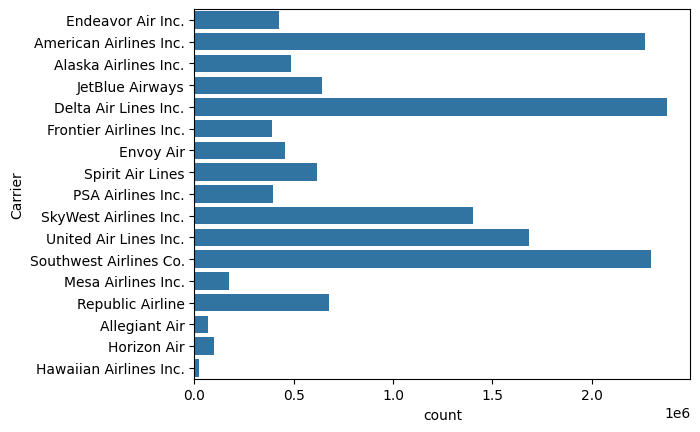

In [9]:
sns.countplot(data=df["Carrier"])

In [10]:
df["Origin"].unique()

array(['ATL', 'AUS', 'BNA', 'BOS', 'BWI', 'CLT', 'DCA', 'DEN', 'DFW',
       'DTW', 'EWR', 'FLL', 'IAD', 'IAH', 'JFK', 'LAS', 'LAX', 'LGA',
       'MCO', 'MDW', 'MIA', 'MSP', 'ORD', 'PHL', 'PHX', 'SAN', 'SEA',
       'SFO', 'SLC', 'TPA'], dtype=object)

<Axes: xlabel='count', ylabel='Origin'>

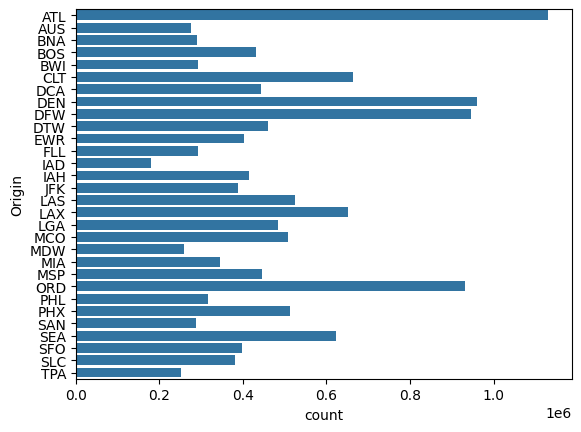

In [11]:
sns.countplot(data=df["Origin"])

In [12]:
df["Dest"].unique()

array(['HOU', 'GPT', 'CAE', 'CHO', 'MOB', 'TRI', 'MSN', 'OAJ', 'SAV',
       'DHN', 'AVL', 'JAN', 'VLD', 'GSO', 'LFT', 'GNV', 'LEX', 'OMA',
       'CHA', 'GRB', 'BTR', 'BMI', 'CHS', 'TYS', 'XNA', 'MGM', 'TUL',
       'AGS', 'BHM', 'BQK', 'HSV', 'ICT', 'MLU', 'IAD', 'TLH', 'VPS',
       'DSM', 'ABY', 'FAY', 'OKC', 'AEX', 'ROA', 'CRW', 'BUF', 'ECP',
       'GSP', 'DAL', 'GTR', 'SGF', 'DAY', 'CSG', 'ILM', 'SHV', 'LIT',
       'MYR', 'FWA', 'ATW', 'ALB', 'EVV', 'ABE', 'MLI', 'SBN', 'MDT',
       'CLT', 'MIA', 'DFW', 'PHX', 'ORD', 'SEA', 'FLL', 'JFK', 'BOS',
       'MCO', 'SMF', 'LAX', 'LGA', 'DCA', 'LAS', 'GEG', 'SAN', 'ONT',
       'BOI', 'SJU', 'PDX', 'SFO', 'TUS', 'DAB', 'SNA', 'PWM', 'DTW',
       'SLC', 'DEN', 'ELP', 'MSP', 'AUS', 'HNL', 'BDL', 'EWR', 'SAT',
       'SYR', 'IAH', 'PHL', 'TPA', 'MCI', 'ROC', 'MKE', 'GRR', 'MLB',
       'BWI', 'PBI', 'CLE', 'ORF', 'STL', 'RSW', 'CVG', 'CMH', 'SRQ',
       'MSY', 'IND', 'RDU', 'MEM', 'SDF', 'JAX', 'PNS', 'PIT', 'JAC',
       'BNA', 'RIC',

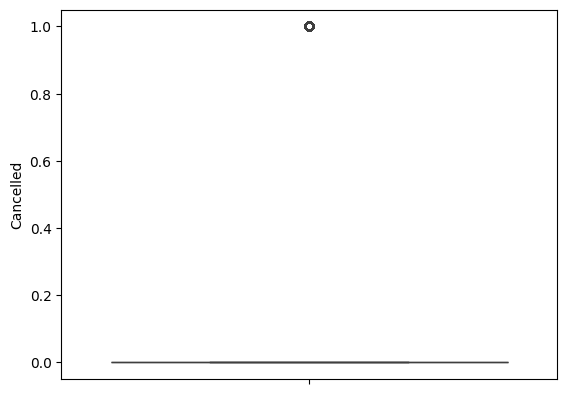

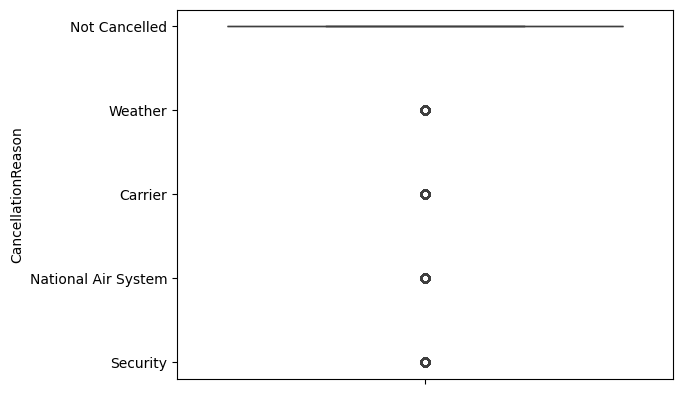

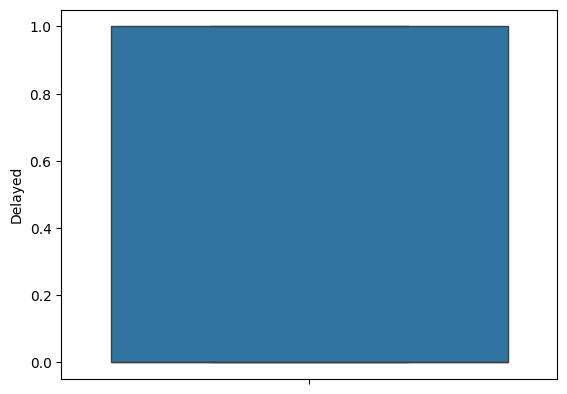

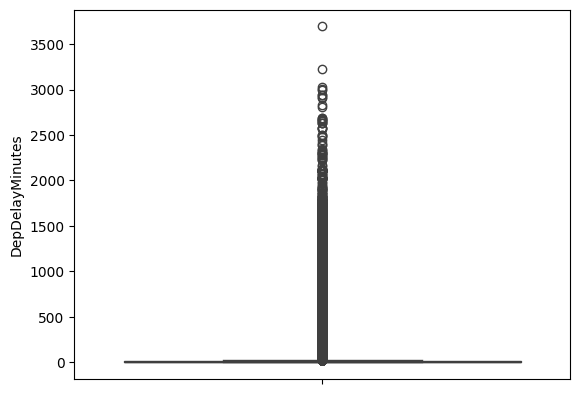

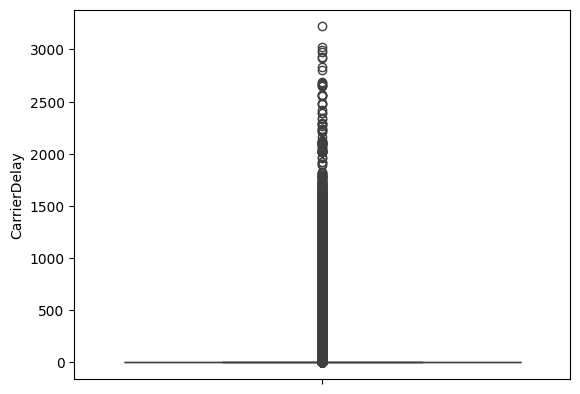

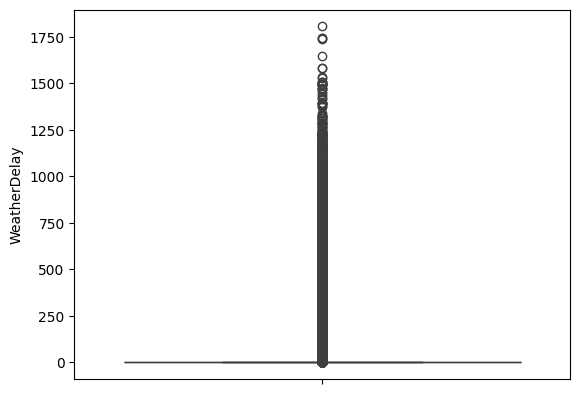

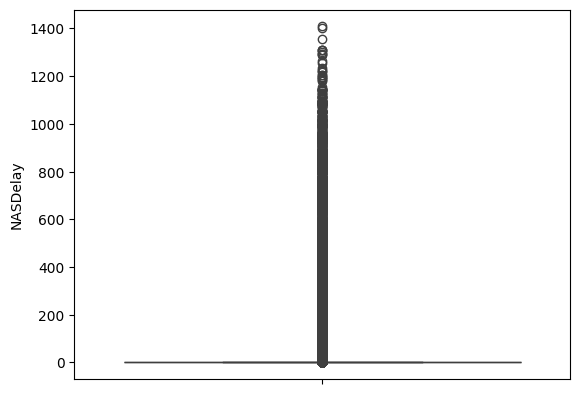

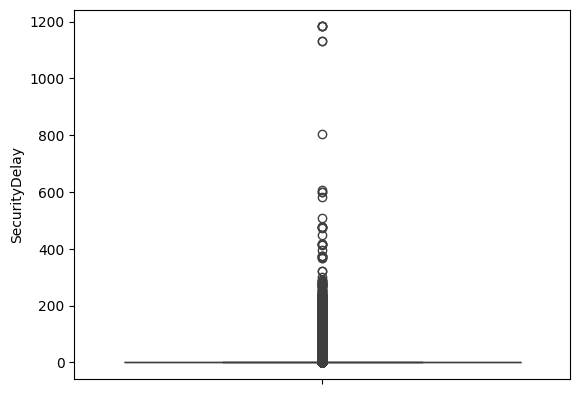

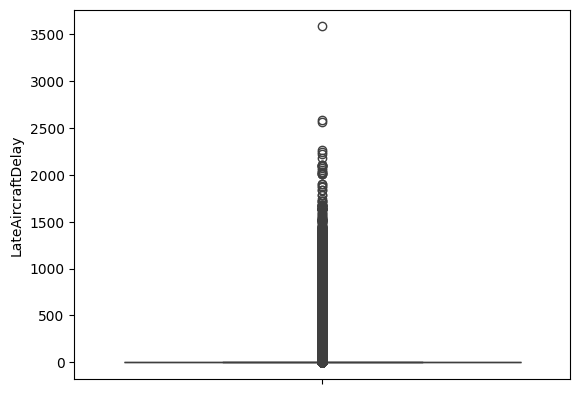

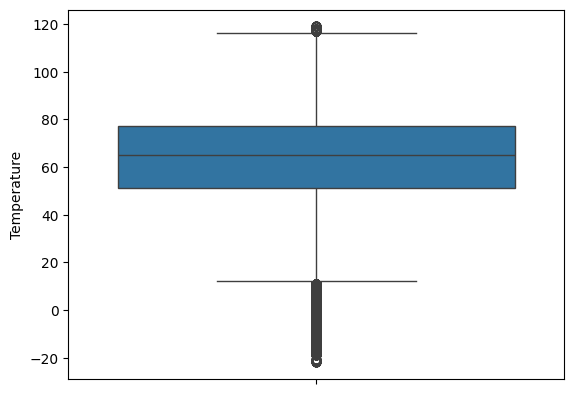

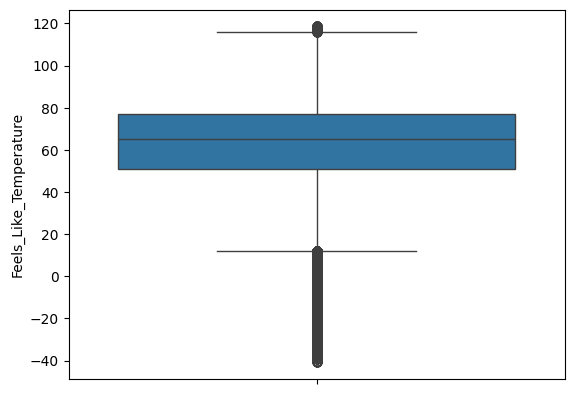

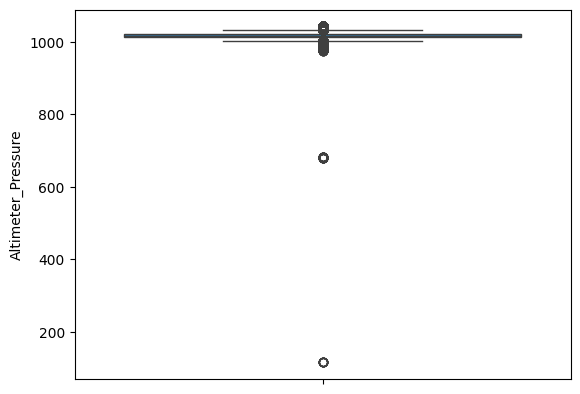

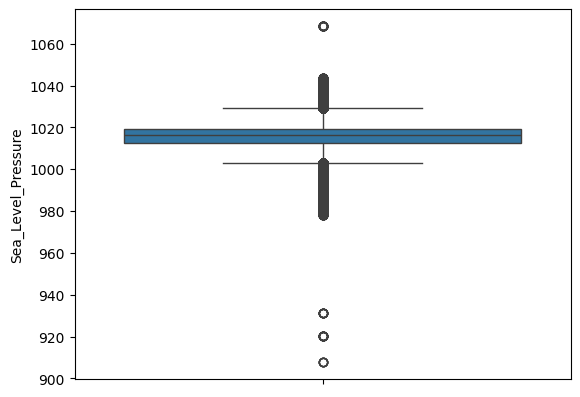

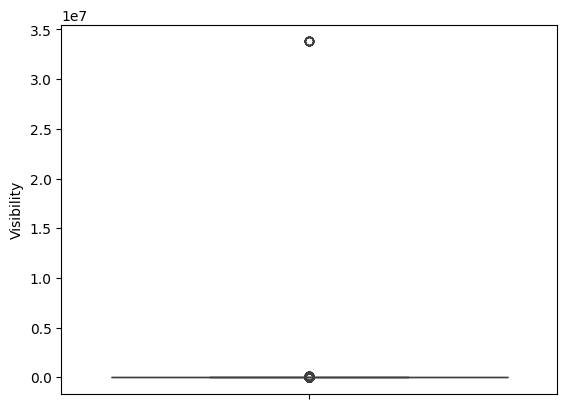

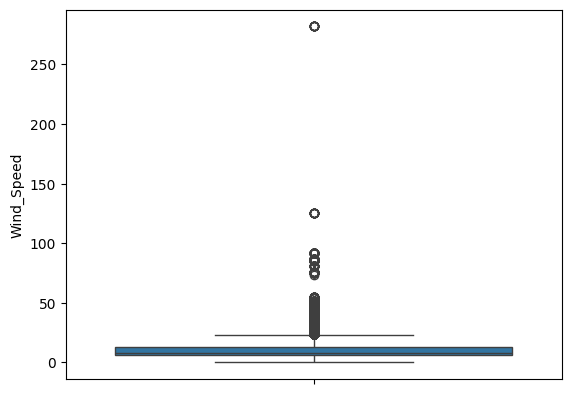

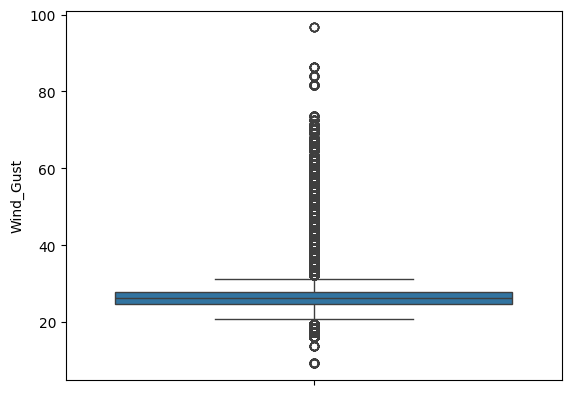

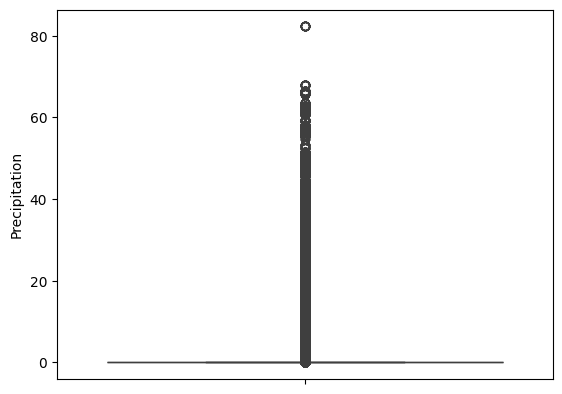

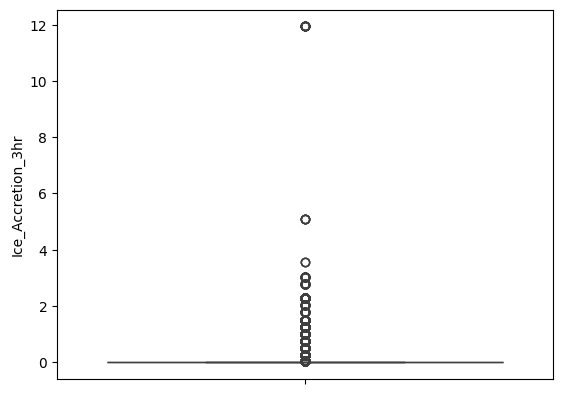

In [13]:
for col in df.columns[4:]:
    sns.boxplot(data=df[col])
    plt.show()

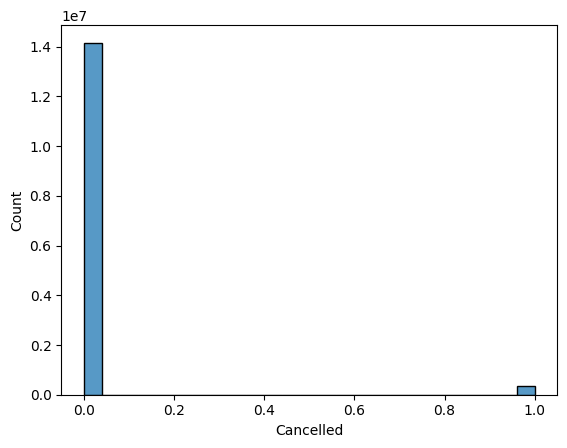

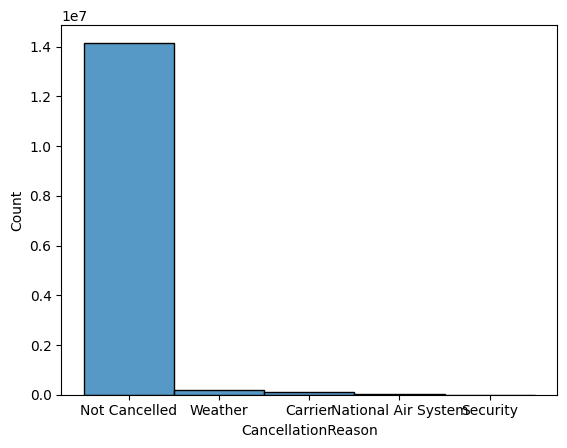

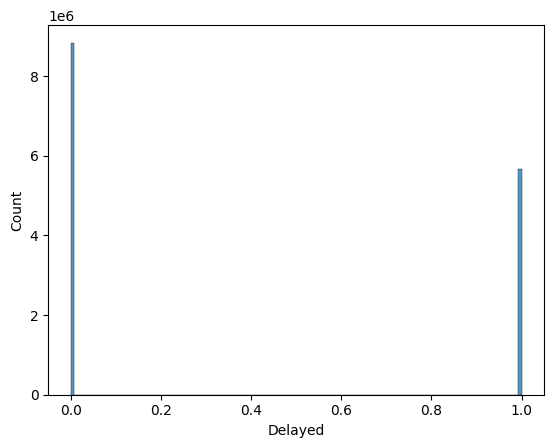

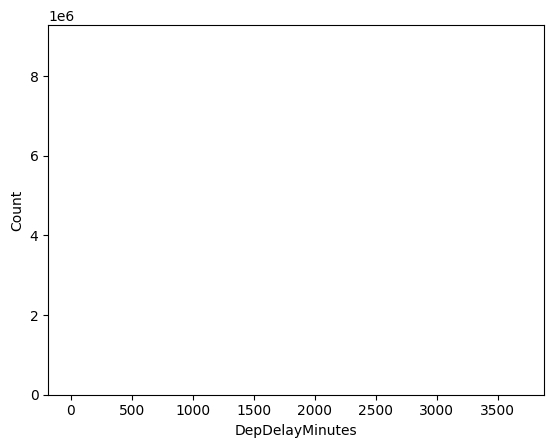

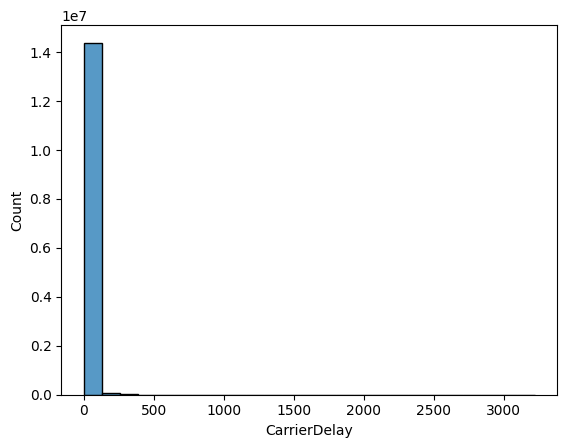

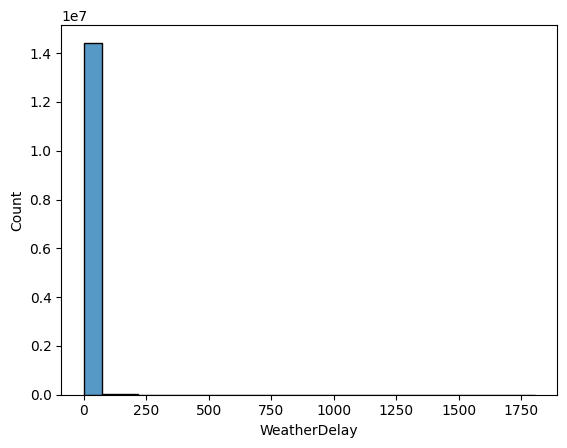

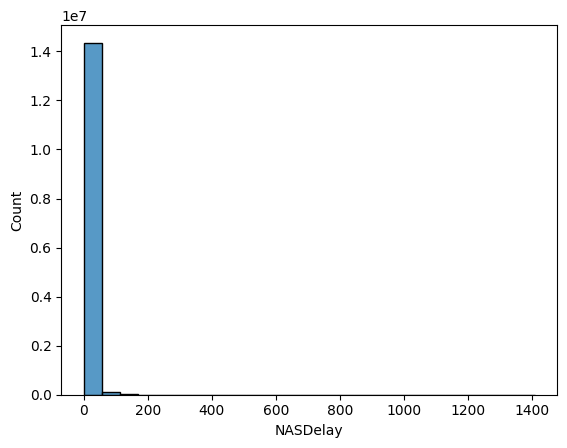

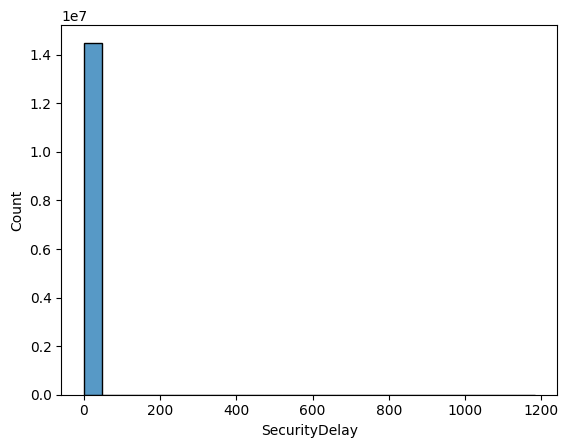

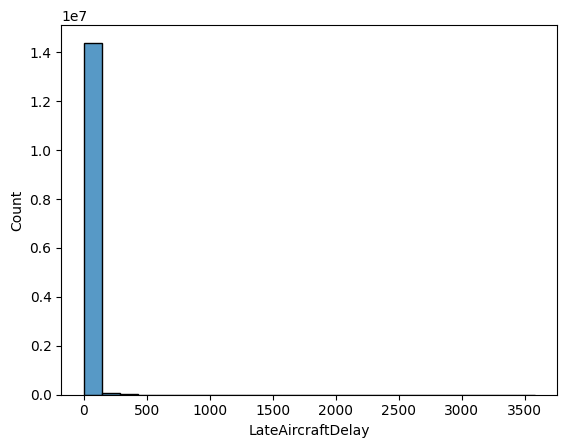

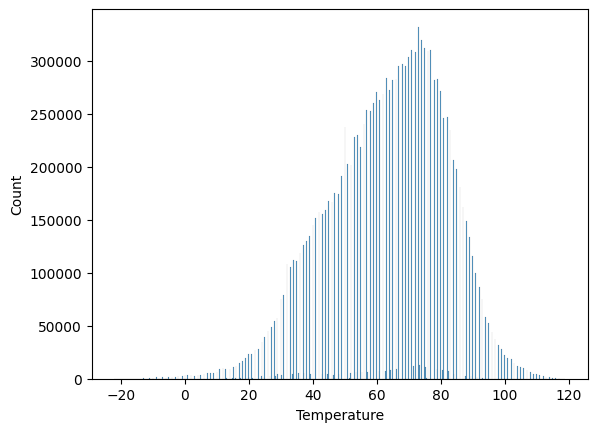

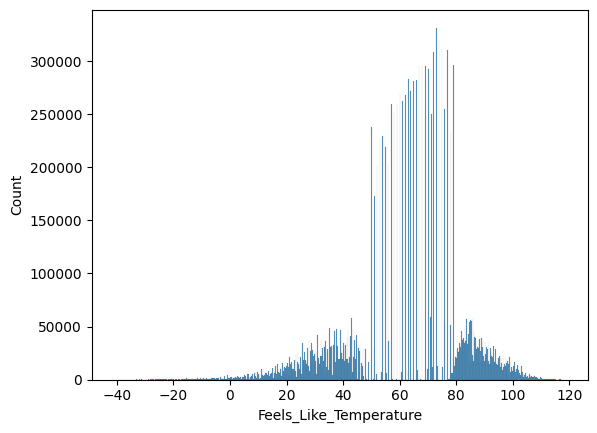

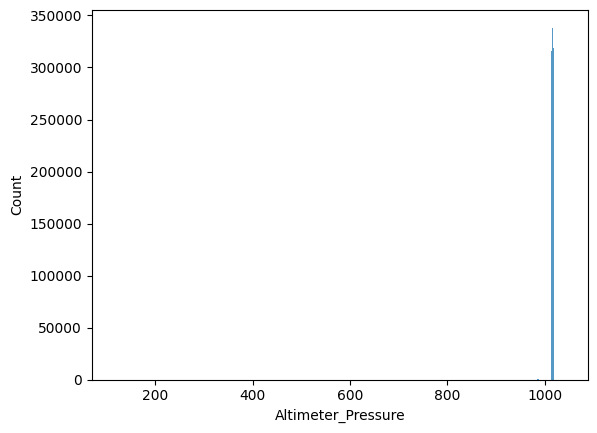

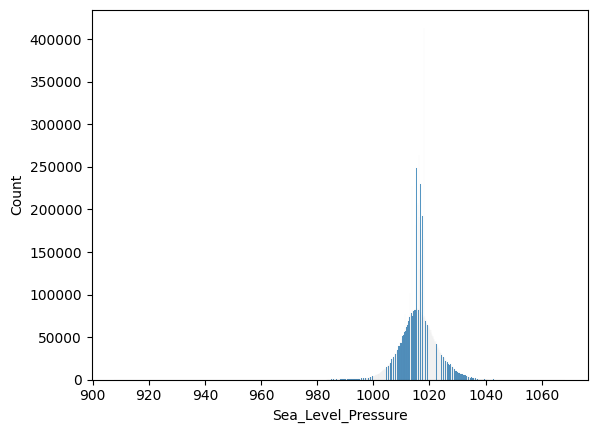

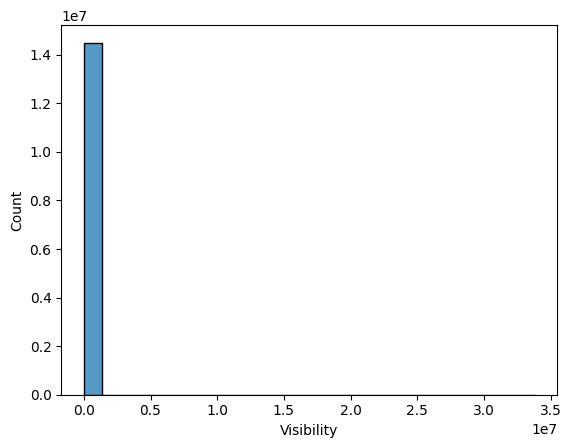

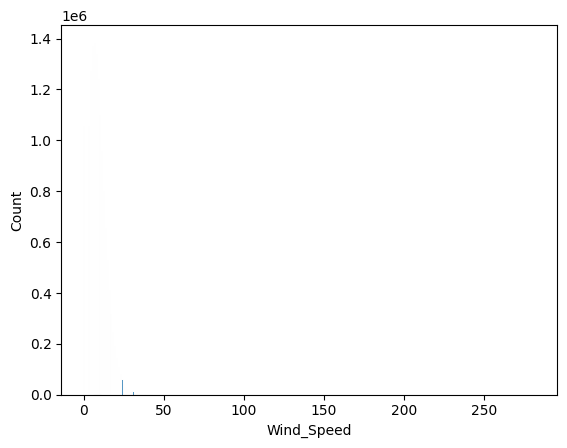

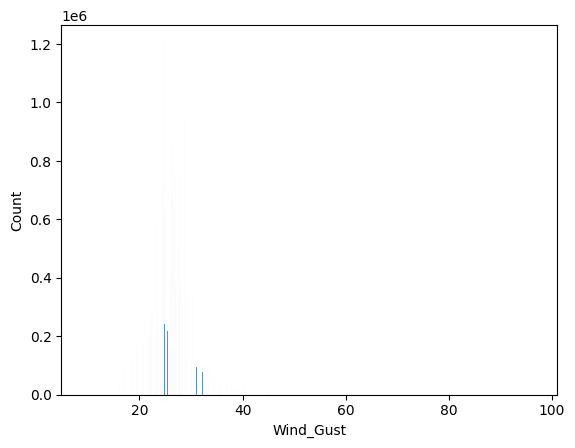

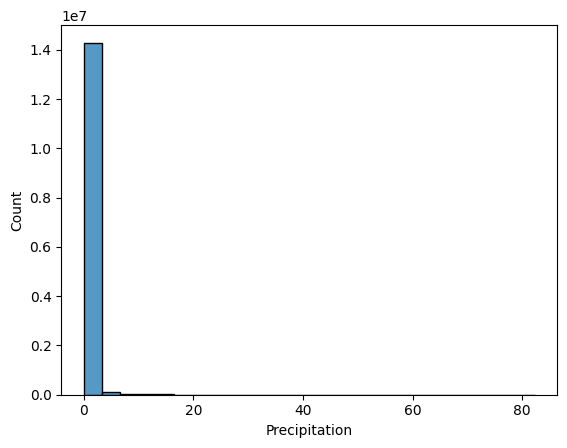

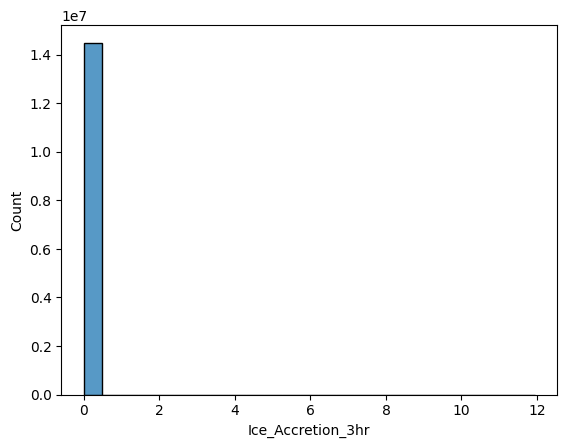

In [14]:
for col in df.columns[4:]:
    sns.histplot(data=df[col])
    plt.show()

I think all of these distributions either have one value that's the extreme majority of the data, like for Ice Accretion and so few of the otehr values that although there is a tail, we can assume normal distribution. On the other hand some data seems to already have pretty good normal distribution like Altimeter Pressure, so we don't have to do anything there either. The only potential exceptions might be Visibility and Wind Speed.

After thinking and examinations of the histograms, I think i will drop FeelsLikeTemp and Altimeter_Pressure from consideration for this model. I think FeelsLikeTemp takes into account wind and precipitation and we have that data already so FeelsLikeTemp is a bit redundant. I also Altimeter_Pressure is redundant with SeaLevelPressure and SeaLevelPressure seems to be the more precise and accurate one of the two.

It was pretty hard to see the distributions of DepDelayMinutes, Wind_Speed, and Wind_Gust so let's try to make a histogram with preset buckets to understand the distribution better.

<Axes: xlabel='DepDelayMinutes', ylabel='Count'>

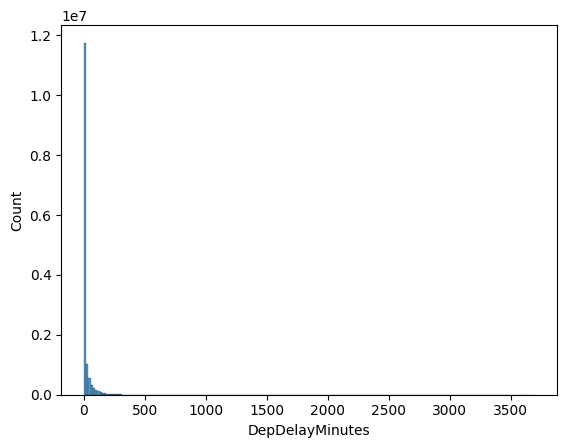

In [23]:
sns.histplot(data = df["DepDelayMinutes"], bins=200)

<Axes: xlabel='Wind_Speed', ylabel='Count'>

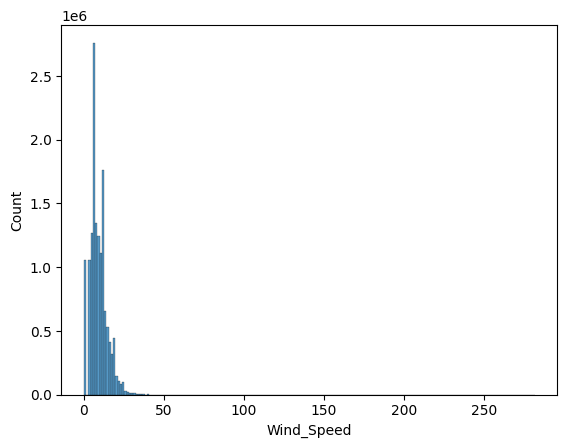

In [22]:
sns.histplot(data = df["Wind_Speed"], bins=200)

<Axes: xlabel='Wind_Gust', ylabel='Count'>

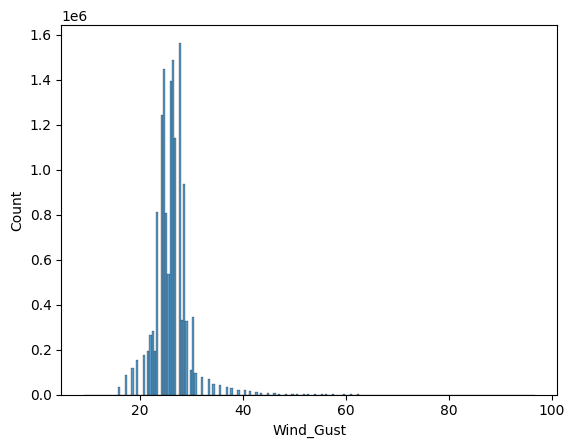

In [24]:
sns.histplot(data = df["Wind_Gust"], bins=200)

### Centering

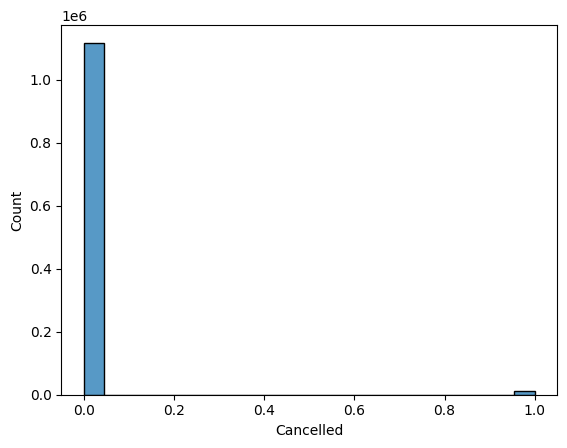

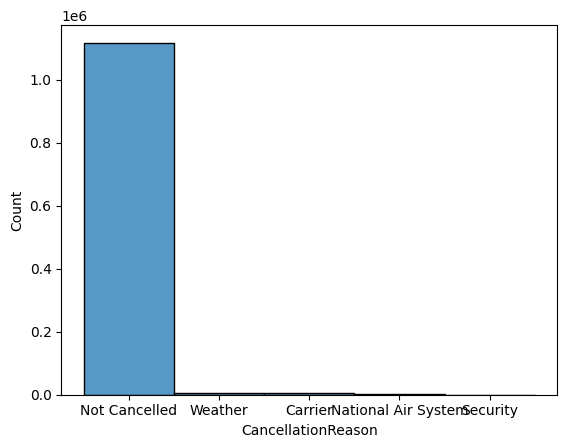

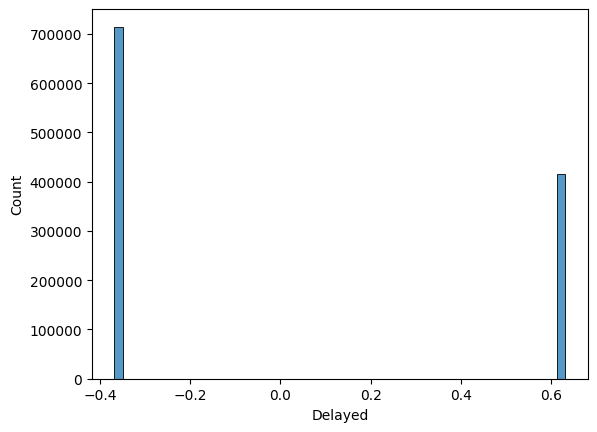

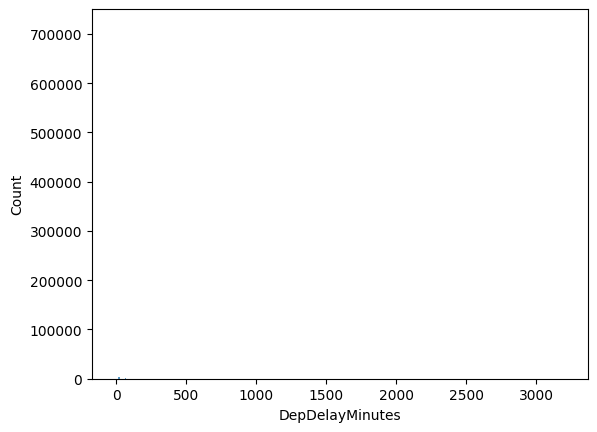

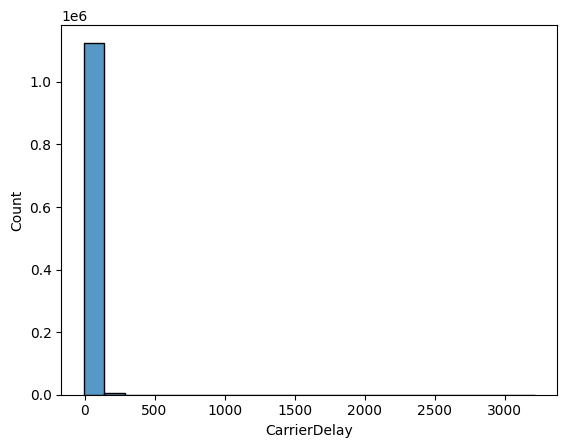

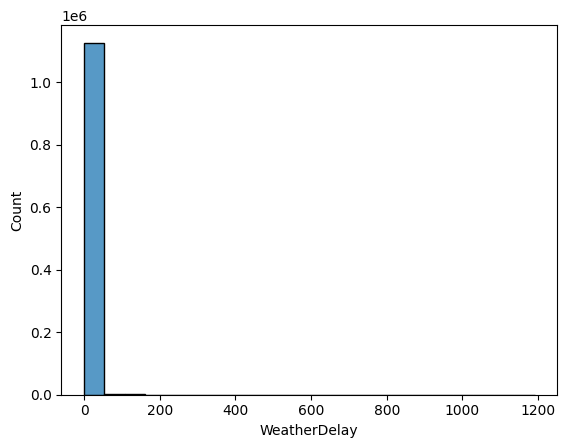

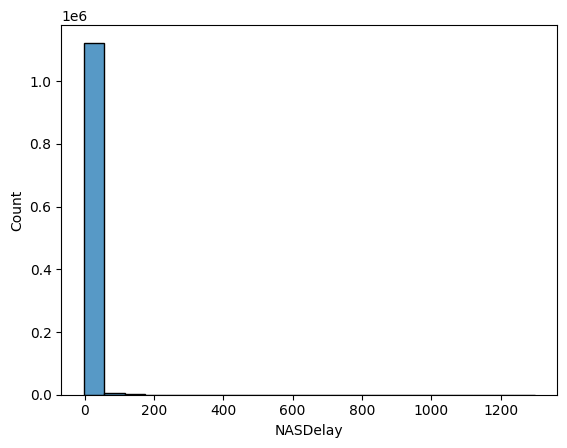

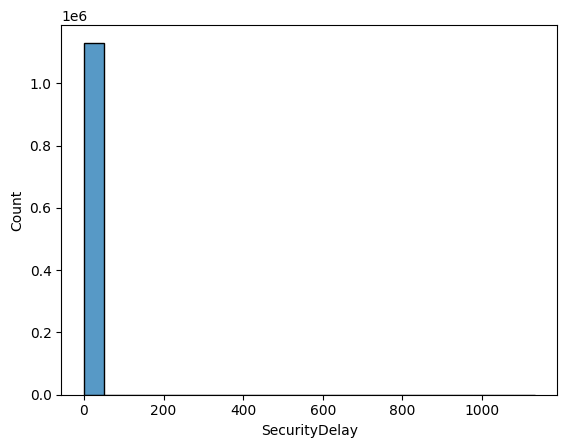

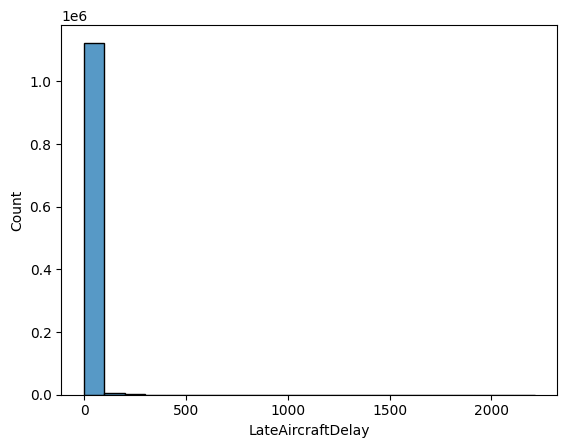

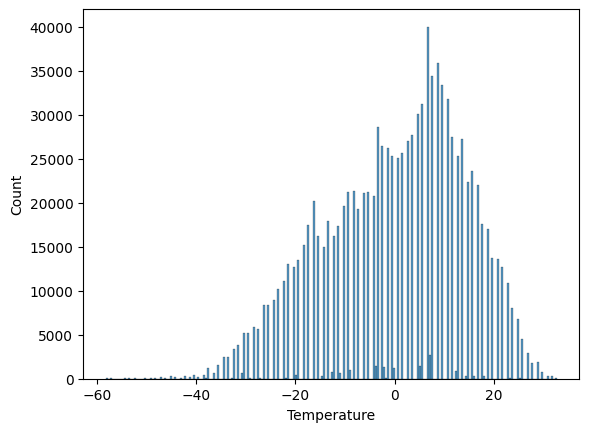

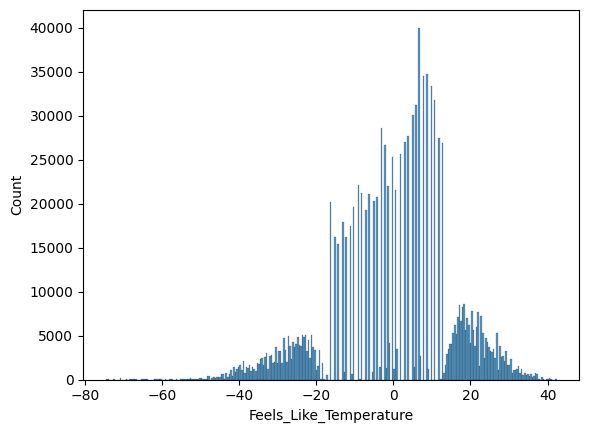

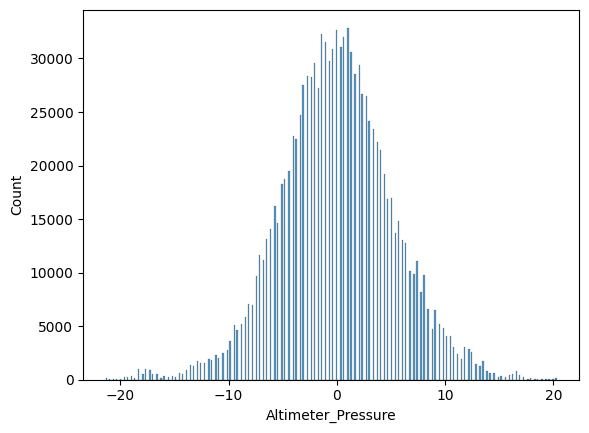

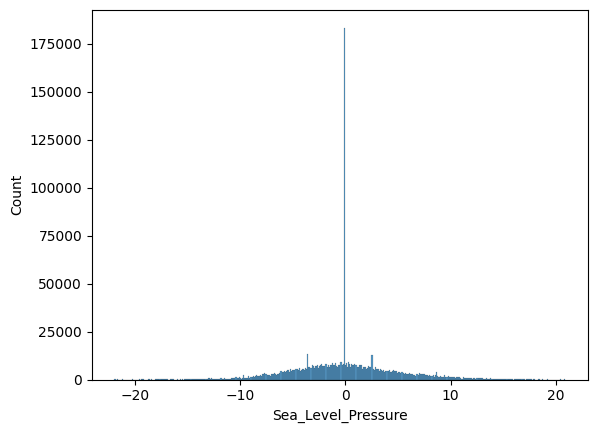

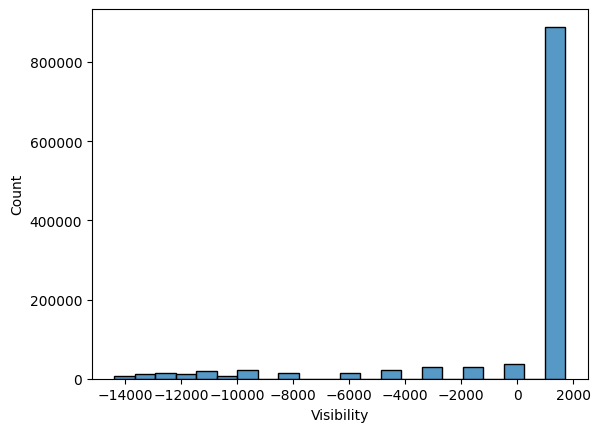

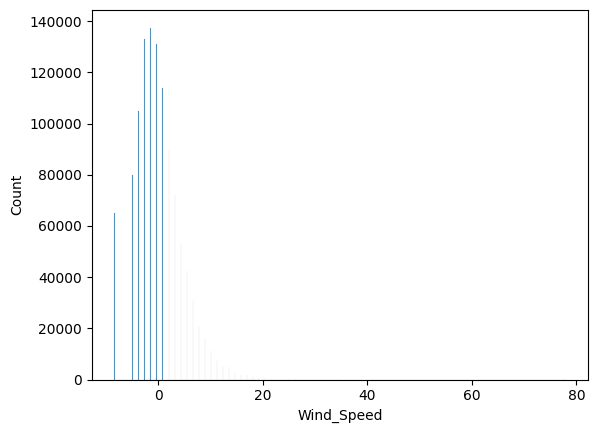

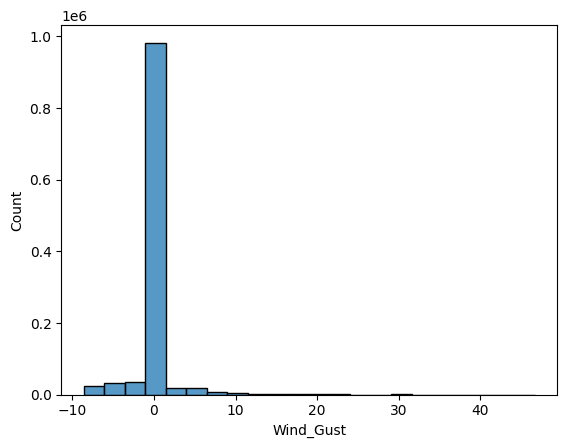

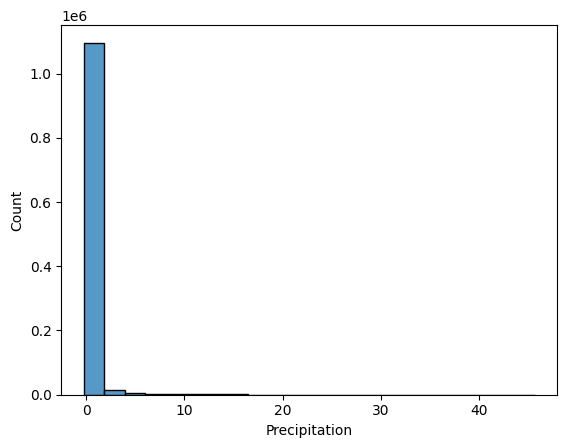

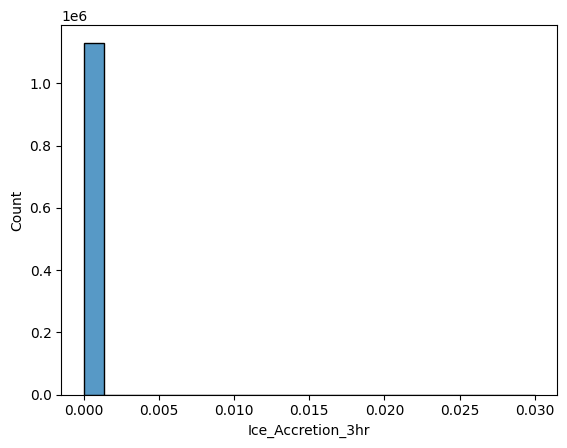

In [13]:
for col in df.columns[6:]:
    mean = df[col].mean()
    df[col] = df[col].subtract(mean)
 
for col in df.columns[4:]:
    sns.histplot(data=df[col])
    plt.show()

### Encoding

In [29]:
frequency = df["Origin"].value_counts().to_dict()
frequency

{'ATL': 1130743,
 'DEN': 959826,
 'DFW': 946119,
 'ORD': 931676,
 'CLT': 663016,
 'LAX': 650471,
 'SEA': 623534,
 'LAS': 525082,
 'PHX': 511745,
 'MCO': 508198,
 'LGA': 482894,
 'DTW': 461035,
 'MSP': 446812,
 'DCA': 442469,
 'BOS': 431443,
 'IAH': 414754,
 'EWR': 403017,
 'SFO': 398942,
 'JFK': 388298,
 'SLC': 380735,
 'MIA': 344836,
 'PHL': 316851,
 'FLL': 293409,
 'BWI': 292742,
 'BNA': 289830,
 'SAN': 288079,
 'AUS': 276809,
 'MDW': 259174,
 'TPA': 251477,
 'IAD': 180027}

In [30]:
df["Origin_counts"] = df["Origin"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Dest_counts,Carrier_counts,Origin_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1014.90,1014.6,8046.7,8.06,20.71,1.02,0.0,89397,427178,1130743
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1014.90,1018.0,16093.4,10.36,24.74,0.51,0.0,89397,427178,1130743
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1016.26,1015.8,16093.4,5.75,24.74,0.00,0.0,89397,427178,1130743
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,1016.93,1017.2,16093.4,14.96,20.71,0.00,0.0,89397,427178,1130743
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1016.93,1017.0,16093.4,6.90,24.74,0.00,0.0,89397,427178,1130743


In [25]:
frequency = df["Dest"].value_counts().to_dict()
frequency

{'ATL': 485285,
 'ORD': 437771,
 'DEN': 422264,
 'LAX': 407834,
 'DFW': 361595,
 'MCO': 334625,
 'LAS': 329536,
 'BOS': 325352,
 'PHX': 299909,
 'SFO': 281520,
 'CLT': 281397,
 'LGA': 272200,
 'IAH': 271410,
 'SEA': 265825,
 'EWR': 264414,
 'JFK': 255093,
 'DTW': 252014,
 'MIA': 251629,
 'DCA': 224257,
 'MSP': 222365,
 'BNA': 219898,
 'FLL': 219299,
 'SLC': 203086,
 'AUS': 202284,
 'PHL': 195013,
 'TPA': 190655,
 'SAN': 179837,
 'RDU': 172779,
 'BWI': 165264,
 'STL': 147528,
 'MDW': 142515,
 'PDX': 141092,
 'MSY': 137038,
 'MCI': 132127,
 'IND': 127601,
 'IAD': 125336,
 'CLE': 124652,
 'PIT': 120896,
 'SMF': 120886,
 'CMH': 120548,
 'DAL': 119720,
 'CVG': 113407,
 'SNA': 106200,
 'SJC': 105760,
 'RSW': 99171,
 'SJU': 97756,
 'SAT': 97450,
 'JAX': 89517,
 'HOU': 89397,
 'MKE': 79722,
 'CHS': 79494,
 'OAK': 75523,
 'PBI': 72755,
 'SDF': 69981,
 'MEM': 69835,
 'BDL': 68915,
 'ORF': 68866,
 'OMA': 68752,
 'BOI': 66812,
 'HNL': 64478,
 'OKC': 63288,
 'BUF': 62797,
 'RIC': 59704,
 'RNO': 589

In [26]:
df["Dest_counts"] = df["Dest"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Dest_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,66.0,66.0,1014.90,1014.6,8046.7,8.06,20.71,1.02,0.0,89397
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,66.0,66.0,1014.90,1018.0,16093.4,10.36,24.74,0.51,0.0,89397
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,62.0,62.1,1016.26,1015.8,16093.4,5.75,24.74,0.00,0.0,89397
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,50.0,50.0,1016.93,1017.2,16093.4,14.96,20.71,0.00,0.0,89397
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,56.0,55.9,1016.93,1017.0,16093.4,6.90,24.74,0.00,0.0,89397


In [27]:
frequency = df["Carrier"].value_counts().to_dict()
frequency

{'Delta Air Lines Inc.': 2377939,
 'Southwest Airlines Co.': 2300272,
 'American Airlines Inc.': 2268655,
 'United Air Lines Inc.': 1682510,
 'SkyWest Airlines Inc.': 1402746,
 'Republic Airline': 677025,
 'JetBlue Airways': 641668,
 'Spirit Air Lines': 615210,
 'Alaska Airlines Inc.': 485675,
 'Envoy Air': 458188,
 'Endeavor Air Inc.': 427178,
 'PSA Airlines Inc.': 397551,
 'Frontier Airlines Inc.': 390637,
 'Mesa Airlines Inc.': 175644,
 'Horizon Air': 98749,
 'Allegiant Air': 70577,
 'Hawaiian Airlines Inc.': 23819}

In [28]:
df["Carrier_counts"] = df["Carrier"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Dest_counts,Carrier_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,66.0,1014.90,1014.6,8046.7,8.06,20.71,1.02,0.0,89397,427178
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,66.0,1014.90,1018.0,16093.4,10.36,24.74,0.51,0.0,89397,427178
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,62.1,1016.26,1015.8,16093.4,5.75,24.74,0.00,0.0,89397,427178
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,50.0,1016.93,1017.2,16093.4,14.96,20.71,0.00,0.0,89397,427178
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,55.9,1016.93,1017.0,16093.4,6.90,24.74,0.00,0.0,89397,427178


In [31]:
frequency = df["CancellationReason"].value_counts().to_dict()
frequency

{'Not Cancelled': 14162151,
 'Weather': 192961,
 'Carrier': 102604,
 'National Air System': 34763,
 'Security': 1564}

In [32]:
df["Cancellation_counts"] = df["CancellationReason"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Dest_counts,Carrier_counts,Origin_counts,Cancellation_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1014.6,8046.7,8.06,20.71,1.02,0.0,89397,427178,1130743,14162151
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1018.0,16093.4,10.36,24.74,0.51,0.0,89397,427178,1130743,14162151
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1015.8,16093.4,5.75,24.74,0.00,0.0,89397,427178,1130743,14162151
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,1017.2,16093.4,14.96,20.71,0.00,0.0,89397,427178,1130743,14162151
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1017.0,16093.4,6.90,24.74,0.00,0.0,89397,427178,1130743,14162151


### Ranges for Visibility encoding
* Visual Flight Rules: >5 miles, >8048 meters
* Mariginal Visual Flight Rules: 3-5 miles, 4828-8048 meters
* Instument Flight Rules: 1-3 miles, 1610-4828 meters
* Low Instrument Flight Rules: <1 mile, <1610 meters

In [35]:
df["Visibility_classes"] = pd.cut(df["Visibility"], [0, 1610, 4828, 8048, 100000], right=False,
                       labels=["Low Instrument Flight Rules", "Instument Flight Rules", 
                               "Mariginal Visual Flight Rules", "Visual Flight Rules"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Dest_counts,Carrier_counts,Origin_counts,Cancellation_counts,Visibility_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,8046.7,8.06,20.71,1.02,0.0,89397,427178,1130743,14162151,Mariginal Visual Flight Rules
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,16093.4,10.36,24.74,0.51,0.0,89397,427178,1130743,14162151,Visual Flight Rules
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,16093.4,5.75,24.74,0.00,0.0,89397,427178,1130743,14162151,Visual Flight Rules
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,16093.4,14.96,20.71,0.00,0.0,89397,427178,1130743,14162151,Visual Flight Rules
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,16093.4,6.90,24.74,0.00,0.0,89397,427178,1130743,14162151,Visual Flight Rules


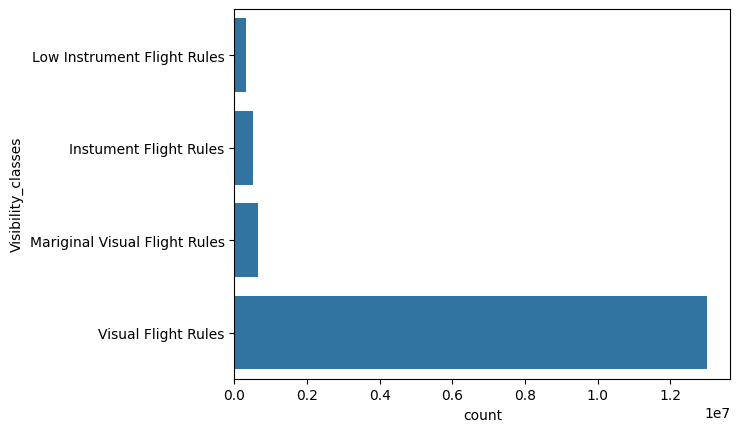

In [37]:
sns.countplot(data=df["Visibility_classes"])
plt.show()

In [38]:
frequency = df["Visibility_classes"].value_counts().to_dict()
frequency

{'Visual Flight Rules': 13008667,
 'Mariginal Visual Flight Rules': 648706,
 'Instument Flight Rules': 521136,
 'Low Instrument Flight Rules': 315512}

In [39]:
df["Visbility_counts"] = df["Visibility_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Dest_counts,Carrier_counts,Origin_counts,Cancellation_counts,Visibility_classes,Visbility_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,8.06,20.71,1.02,0.0,89397,427178,1130743,14162151,Mariginal Visual Flight Rules,648706
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,10.36,24.74,0.51,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,5.75,24.74,0.00,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,14.96,20.71,0.00,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,6.90,24.74,0.00,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667


### Ranges for Wind Speed and Wind Gust
I think there's more categories then we'll need so I will combine some. I'm using the Beaufort scale.
* Gentle Breeze: 0-10 mph
* Strong Breeze: 10-30 mph
* Gale: 30-50
* Storm: 50-70 mph
* Hurricane: >70 mph

In [40]:
df["WindSpeed_classes"] = pd.cut(df["Wind_Speed"], [0, 10, 30, 50, 70, 500], right=False,
                       labels=["Gentle Breeze", "Strong Breeze", "Gale", "Storm", "Hurricane"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Wind_Gust,Precipitation,Ice_Accretion_3hr,Dest_counts,Carrier_counts,Origin_counts,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,20.71,1.02,0.0,89397,427178,1130743,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,24.74,0.51,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Strong Breeze
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,24.74,0.00,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Gentle Breeze
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,20.71,0.00,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Strong Breeze
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,24.74,0.00,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Gentle Breeze


In [41]:
frequency = df["WindSpeed_classes"].value_counts().to_dict()
frequency

{'Gentle Breeze': 8735999,
 'Strong Breeze': 5727758,
 'Gale': 30002,
 'Hurricane': 176,
 'Storm': 108}

In [42]:
df["WindSpeed_counts"] = df["WindSpeed_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Precipitation,Ice_Accretion_3hr,Dest_counts,Carrier_counts,Origin_counts,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1.02,0.0,89397,427178,1130743,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,0.51,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.00,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,0.00,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.00,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999


In [43]:
df["WindGust_classes"] = pd.cut(df["Wind_Gust"], [0, 10, 30, 50, 70, 500], right=False,
                       labels=["Gentle Breeze", "Strong Breeze", "Gale", "Storm", "Hurricane"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Ice_Accretion_3hr,Dest_counts,Carrier_counts,Origin_counts,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,0.0,89397,427178,1130743,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999,Strong Breeze
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze


In [44]:
frequency = df["WindGust_classes"].value_counts().to_dict()
frequency

{'Strong Breeze': 13640748,
 'Gale': 840237,
 'Storm': 12665,
 'Hurricane': 359,
 'Gentle Breeze': 34}

In [45]:
df["WindGust_counts"] = df["WindGust_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Dest_counts,Carrier_counts,Origin_counts,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,89397,427178,1130743,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999,Strong Breeze,13640748
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,89397,427178,1130743,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748


### Ranges for Precipitation
from the Manual of Surface Weather Observations
* Light Rain: <2.5 mm/h
* Moderate Rain: 2.5-7.5 mm/h
* Heavy Rain: 7.5-50 mm/h
* Violent Rain: >50 mm/h

In [46]:
df["Precipitation_classes"] = pd.cut(df["Precipitation"], [0, 2.5, 7.5, 50, 500], right=False,
                       labels=["Light Rain", "Moderate Rain", "Heavy Rain", "Violent Rain"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Carrier_counts,Origin_counts,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts,Precipitation_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,427178,1130743,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,427178,1130743,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,427178,1130743,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,427178,1130743,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,427178,1130743,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain


In [48]:
frequency = df["Precipitation_classes"].value_counts().to_dict()
frequency

{'Light Rain': 14227970,
 'Moderate Rain': 192847,
 'Heavy Rain': 72677,
 'Violent Rain': 549}

In [49]:
df["Precipitation_counts"] = df["Precipitation_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Origin_counts,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts,Precipitation_classes,Precipitation_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1130743,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1130743,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain,14227970
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1130743,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,1130743,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain,14227970
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1130743,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970


### Ranges for Ice Accretion
from Aircraft Owners and Pilots Association
* Trace: 0-0.5 mm
* Light: 0.5-2 mm
* Moderate: 2-5 mm
* Severe: >5 mm

In [54]:
df["Ice_classes"] = pd.cut(df["Ice_Accretion_3hr"], [0, 0.5, 2, 5, 20], right=False,
                       labels=["Trace", "Light", "Moderate", "Severe"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts,Precipitation_classes,Precipitation_counts,Ice_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970,Trace
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain,14227970,Trace
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970,Trace
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain,14227970,Trace
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970,Trace


In [55]:
frequency = df["Ice_classes"].value_counts().to_dict()
frequency

{'Trace': 14492660, 'Light': 1042, 'Moderate': 313, 'Severe': 28}

In [56]:
df["Ice_counts"] = df["Ice_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts,Precipitation_classes,Precipitation_counts,Ice_classes,Ice_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970,Trace,14492660
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain,14227970,Trace,14492660
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970,Trace,14492660
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain,14227970,Trace,14492660
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970,Trace,14492660


### Predictor Variables
* Origin
* Dest
* Carrier
* Temperature
* Sea Level Pressure
* Visibility
* Wind Speed
* Wind Gust
* Precipitation
* Ice Accretion

### Response Varibles
* Cancelled
* Cancellation Reason
* Delayed
* Departure Delay Minutes
* Carrier Delay
* Weather Delay
* NAS Delay
* Security Delay
* Late Aircraft Delay